In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("owid-covid-data.csv")

In [2]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
len(data.columns)

67

In [4]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
data.shape

(187801, 67)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187801 entries, 0 to 187800
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    187801 non-null  object 
 1   continent                                   176870 non-null  object 
 2   location                                    187801 non-null  object 
 3   date                                        187801 non-null  object 
 4   total_cases                                 180399 non-null  float64
 5   new_cases                                   180190 non-null  float64
 6   new_cases_smoothed                          179016 non-null  float64
 7   total_deaths                                162023 non-null  float64
 8   new_deaths                                  162021 non-null  float64
 9   new_deaths_smoothed                         160860 non-null  float64
 

In [7]:
len(data["location"].unique())

244

In [8]:
data["continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [9]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187796,ZWE,Africa,Zimbabwe,2022-05-15,249206.0,0.0,122.000,5482.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187797,ZWE,Africa,Zimbabwe,2022-05-16,249431.0,225.0,127.857,5484.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187798,ZWE,Africa,Zimbabwe,2022-05-17,249748.0,317.0,158.000,5484.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187799,ZWE,Africa,Zimbabwe,2022-05-18,250007.0,259.0,195.000,5486.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [10]:
data.index = pd.to_datetime(data.index)

In [11]:
fields = ["iso_code","continent","location","tests_units"]

In [12]:
data[fields]

,iso_code,continent,location,tests_units
1970-01-01 00:00:00.000000000,AFG,Asia,Afghanistan,NaN
1970-01-01 00:00:00.000000001,AFG,Asia,Afghanistan,NaN
1970-01-01 00:00:00.000000002,AFG,Asia,Afghanistan,NaN
1970-01-01 00:00:00.000000003,AFG,Asia,Afghanistan,NaN
1970-01-01 00:00:00.000000004,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
1970-01-01 00:00:00.000187796,ZWE,Africa,Zimbabwe,tests performed
1970-01-01 00:00:00.000187797,ZWE,Africa,Zimbabwe,tests performed
1970-01-01 00:00:00.000187798,ZWE,Africa,Zimbabwe,tests performed
1970-01-01 00:00:00.000187799,ZWE,Africa,Zimbabwe,tests performed


In [13]:
data[fields] = data[fields].astype("category")

In [14]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1970-01-01 00:00:00.000000000,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000001,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000002,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000003,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000000004,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000187796,ZWE,Africa,Zimbabwe,2022-05-15,249206.0,0.0,122.000,5482.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000187797,ZWE,Africa,Zimbabwe,2022-05-16,249431.0,225.0,127.857,5484.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000187798,ZWE,Africa,Zimbabwe,2022-05-17,249748.0,317.0,158.000,5484.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
1970-01-01 00:00:00.000187799,ZWE,Africa,Zimbabwe,2022-05-18,250007.0,259.0,195.000,5486.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187801 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000187800
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   iso_code                                    187801 non-null  category
 1   continent                                   176870 non-null  category
 2   location                                    187801 non-null  category
 3   date                                        187801 non-null  object  
 4   total_cases                                 180399 non-null  float64 
 5   new_cases                                   180190 non-null  float64 
 6   new_cases_smoothed                          179016 non-null  float64 
 7   total_deaths                                162023 non-null  float64 
 8   new_deaths                                  162021 non-null  float64 
 9   new_deaths_smoo

In [16]:
data["location"].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=244)

In [17]:
data_india = data[data["location"]=="India"]

In [18]:
import matplotlib.pyplot as plt

In [19]:
fields = ["new_cases","new_cases_smoothed"]

<AxesSubplot:>

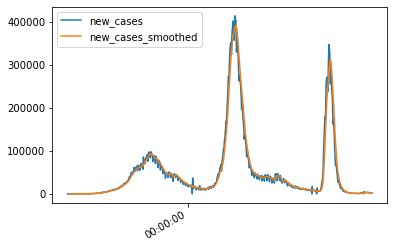

In [20]:
data_india[fields].plot()

In [21]:
datframe = data[fields].dropna()

In [22]:
datframe.columns

Index(['new_cases', 'new_cases_smoothed'], dtype='object')

In [26]:
y_d = datframe["new_cases"]
y_d

1970-01-01 00:00:00.000000005      0.0
1970-01-01 00:00:00.000000006      0.0
1970-01-01 00:00:00.000000007      0.0
1970-01-01 00:00:00.000000008      0.0
1970-01-01 00:00:00.000000009      0.0
                                 ...  
1970-01-01 00:00:00.000187796      0.0
1970-01-01 00:00:00.000187797    225.0
1970-01-01 00:00:00.000187798    317.0
1970-01-01 00:00:00.000187799    259.0
1970-01-01 00:00:00.000187800    199.0
Name: new_cases, Length: 179016, dtype: float64

In [24]:
def lag(y,x,lag):
    r = [0]*(lag+1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"
    for i in range(0,lag+1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i),how = "outer")
        r[i]=ds.corr().values[0][1]
    r = pd.DataFrame(r) 
    r.index.names = ["lag"]
    r.columns = ['correlation']
    return r

In [25]:

y_dataset = pd.DataFrame(lag(y_d,y_d,50))
y_dataset

ValueError: columns overlap but no suffix specified: Index(['new_cases'], dtype='object')

In [31]:
b = pd.Series([1,2,3,4])

In [29]:
a.name = "y"

In [30]:
a

0    1
1    2
2    3
3    4
Name: y, dtype: int64

In [34]:
b.index.names = ["lag"]

In [35]:
b

lag
0    1
1    2
2    3
3    4
dtype: int64

In [40]:
r = [0]*4
for i in range(0,4):
    ds = a.copy().to_frame()
    ds = ds.join(b.shift(i),how = "outer")
    r[i] = ds.corr().values[0][1]
r = pd.DataFrame(r)

ValueError: columns overlap but no suffix specified: Index(['y'], dtype='object')

In [49]:
ds = y_d.copy().to_frame()
x= y_d

In [50]:
y_d.shift(1)

1970-01-01 00:00:00.000000005      NaN
1970-01-01 00:00:00.000000006      0.0
1970-01-01 00:00:00.000000007      0.0
1970-01-01 00:00:00.000000008      0.0
1970-01-01 00:00:00.000000009      0.0
                                 ...  
1970-01-01 00:00:00.000187796     75.0
1970-01-01 00:00:00.000187797      0.0
1970-01-01 00:00:00.000187798    225.0
1970-01-01 00:00:00.000187799    317.0
1970-01-01 00:00:00.000187800    259.0
Name: new_cases, Length: 179016, dtype: float64

In [52]:
ds = ds.join(x.shift(1),lsuffix = "_left",how = "outer")

In [66]:
r = ds.corr().values[0][1]
r = pd.DataFrame([r],columns = ["Name"])
r

,Name
0,0.973361


In [57]:
r.index.name = ["Lag"]
r.columns = ["Correlation"]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [86]:
def lag_correlation(y,x,lag):
    r = [0]*51
    y = y.copy()
    x = x.copy()
    for i in range(0,lag+1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), lsuffix = "_left",how = "outer")
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ["Lag"]
    r.columns = ["Correlation"]
    return r

     Correlation
Lag             
0         1.0000
1         0.9734
2         0.9503
3         0.9389
4         0.9354
5         0.9418
6         0.9595
7         0.9707
8         0.9489
9         0.9219
10        0.9043
11        0.8990
12        0.9002
13        0.9124
14        0.9210
15        0.8974
16        0.8684
17        0.8501
18        0.8412
19        0.8413
20        0.8516
21        0.8562
22        0.8340
23        0.8060
24        0.7879
25        0.7797
26        0.7791
27        0.7877
28        0.7923
29        0.7725
30        0.7466
31        0.7310
32        0.7238
33        0.7253
34        0.7334
35        0.7386
36        0.7213
37        0.6994
38        0.6860
39        0.6809
40        0.6833
41        0.6914
42        0.6972
43        0.6825
44        0.6626
45        0.6504
46        0.6470
47        0.6504
48        0.6585
49        0.6645
50        0.6501


<AxesSubplot:xlabel='Lag'>

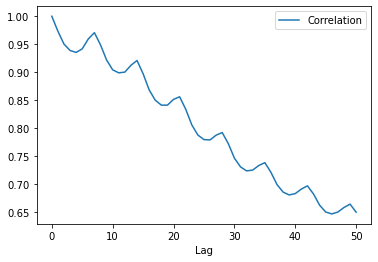

In [87]:
pd.options.display.float_format= '{:,.4f}'.format
l = pd.DataFrame(lag_correlation(y_d,y_d,50))
print(l)
l.plot()

In [95]:
c = pd.DataFrame({"A":[1,2,3],"B":[2,3,4]})
names = []
for i in range(0,1):
    names += [('%s(t-%d)' % (c.columns[j], i)) for j in range(2)]
names

['A(t-0)', 'B(t-0)']

In [ ]:
names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]


In [96]:
tar_data = y_d

In [97]:
tar_data

1970-01-01 00:00:00.000000005     0.0000
1970-01-01 00:00:00.000000006     0.0000
1970-01-01 00:00:00.000000007     0.0000
1970-01-01 00:00:00.000000008     0.0000
1970-01-01 00:00:00.000000009     0.0000
                                  ...   
1970-01-01 00:00:00.000187796     0.0000
1970-01-01 00:00:00.000187797   225.0000
1970-01-01 00:00:00.000187798   317.0000
1970-01-01 00:00:00.000187799   259.0000
1970-01-01 00:00:00.000187800   199.0000
Name: new_cases, Length: 179016, dtype: float64

In [100]:
cols = []
for i in range(50,-1,-1):
    cols.append(tar_data.shift(i))
    names += [('%s(t-%d)' % (tar_data.name,i))]
    

In [101]:
names

['A(t-0)',
 'B(t-0)',
 'new_cases(t-50)',
 'new_cases(t-49)',
 'new_cases(t-48)',
 'new_cases(t-47)',
 'new_cases(t-46)',
 'new_cases(t-45)',
 'new_cases(t-44)',
 'new_cases(t-43)',
 'new_cases(t-42)',
 'new_cases(t-41)',
 'new_cases(t-40)',
 'new_cases(t-39)',
 'new_cases(t-38)',
 'new_cases(t-37)',
 'new_cases(t-36)',
 'new_cases(t-35)',
 'new_cases(t-34)',
 'new_cases(t-33)',
 'new_cases(t-32)',
 'new_cases(t-31)',
 'new_cases(t-30)',
 'new_cases(t-29)',
 'new_cases(t-28)',
 'new_cases(t-27)',
 'new_cases(t-26)',
 'new_cases(t-25)',
 'new_cases(t-24)',
 'new_cases(t-23)',
 'new_cases(t-22)',
 'new_cases(t-21)',
 'new_cases(t-20)',
 'new_cases(t-19)',
 'new_cases(t-18)',
 'new_cases(t-17)',
 'new_cases(t-16)',
 'new_cases(t-15)',
 'new_cases(t-14)',
 'new_cases(t-13)',
 'new_cases(t-12)',
 'new_cases(t-11)',
 'new_cases(t-10)',
 'new_cases(t-9)',
 'new_cases(t-8)',
 'new_cases(t-7)',
 'new_cases(t-6)',
 'new_cases(t-5)',
 'new_cases(t-4)',
 'new_cases(t-3)',
 'new_cases(t-2)',
 'new_

In [135]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

In [139]:
dataset = series_to_supervised(pd.DataFrame(y_d),y_d,14)

In [137]:
dataset

,new_cases(t-0),new_cases(t-1),new_cases(t-2),new_cases(t-3),new_cases(t-4),new_cases(t-5),new_cases(t-6),new_cases(t-7),new_cases(t-8),new_cases(t-9),new_cases(t-10),new_cases(t-11),new_cases(t-12),new_cases(t-13),new_cases(t-14),new_cases
1970-01-01 00:00:00.000000019,3.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000
1970-01-01 00:00:00.000000020,6.0000,3.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0000
1970-01-01 00:00:00.000000021,5.0000,6.0000,3.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000
1970-01-01 00:00:00.000000022,1.0000,5.0000,6.0000,3.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1970-01-01 00:00:00.000000023,0.0000,1.0000,5.0000,6.0000,3.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000187796,0.0000,75.0000,188.0000,301.0000,0.0000,106.0000,184.0000,138.0000,0.0000,164.0000,0.0000,60.0000,55.0000,24.0000,36.0000,0.0000
1970-01-01 00:00:00.000187797,225.0000,0.0000,75.0000,188.0000,301.0000,0.0000,106.0000,184.0000,138.0000,0.0000,164.0000,0.0000,60.0000,55.0000,24.0000,225.0000
1970-01-01 00:00:00.000187798,317.0000,225.0000,0.0000,75.0000,188.0000,301.0000,0.0000,106.0000,184.0000,138.0000,0.0000,164.0000,0.0000,60.0000,55.0000,317.0000
1970-01-01 00:00:00.000187799,259.0000,317.0000,225.0000,0.0000,75.0000,188.0000,301.0000,0.0000,106.0000,184.0000,138.0000,0.0000,164.0000,0.0000,60.0000,259.0000


In [108]:
a.shape

(179016, 1)

In [127]:
y_d.shape

(179016,)

In [142]:
col = dataset.columns

In [143]:
X,Y = dataset[col[1:-1]],dataset[col[-1]]

In [144]:
print("input",X.columns)

input Index(['new_cases(t-1)', 'new_cases(t-2)', 'new_cases(t-3)', 'new_cases(t-4)',
       'new_cases(t-5)', 'new_cases(t-6)', 'new_cases(t-7)', 'new_cases(t-8)',
       'new_cases(t-9)', 'new_cases(t-10)', 'new_cases(t-11)',
       'new_cases(t-12)', 'new_cases(t-13)', 'new_cases(t-14)'],
      dtype='object')


In [145]:
print("Target",Y.name)

Target new_cases


In [146]:
from sklearn.preprocessing import MinMaxScaler

In [147]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

In [154]:
scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1,1))

In [156]:
scaled_y

array([[7.35328181e-07],
       [1.47065636e-06],
       [1.22554697e-06],
       ...,
       [7.76996778e-05],
       [6.34833329e-05],
       [4.87767693e-05]])

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.29, shuffle=False)

In [158]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(127091, 14)
(127091, 1)
(51911, 14)
(51911, 1)


In [159]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

In [164]:
!pip install pmdarima


ImportError: cannot import name 'PD_LT_2' from 'statsmodels.compat.pandas' (D:\Anconda\lib\site-packages\statsmodels\compat\pandas.py)

In [165]:
auto_arima_model=auto_arima(y_train,trace=True,Supress_warnings=True)

NameError: name 'auto_arima' is not defined

In [166]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

ImportError: cannot import name 'PD_LT_2' from 'statsmodels.compat.pandas' (D:\Anconda\lib\site-packages\statsmodels\compat\pandas.py)

In [167]:
start = dataset.index.get_loc('2020-05-1')
end = dataset.index.get_loc('2022-02-02')
print(start,'to',end)

KeyError: '2020-05-1'

In [168]:
pred_future_10101=arima_model_202.predict(start=len(dataset)+1,end=len(dataset)+(180),dynamic=False)
print("The length of pred_future values :",len(pred_future_10101))
pred_future_10101

NameError: name 'arima_model_202' is not defined

In [ ]:
history = [x for x in y_train]
predictions = list()
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from math import sqrt
# walk-forward validation
for t in range(len(y_test)):
	model = ARIMA(history, order=(3,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = y_test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rmse)

In [169]:
y_train

array([[7.35328181e-07],
       [1.47065636e-06],
       [1.22554697e-06],
       ...,
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00]])

In [ ]:
df_2 = pd.DataFrame({'Actual test': y_test, 'ARIMA': predictions,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()